In [6]:
import pandas as pd
import numpy as np

%precision 3

'%.3f'

In [9]:
df = pd.read_csv('../stat_analysis/data/ch2_scores_em.csv', index_col = 'student number')
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [12]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores, 'mathematics':ma_scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name = 'student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [21]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\ 
    summary_df['mathematics_deviation'] * summary_df['english_deviation'] 
summary_df

SyntaxError: unexpected character after line continuation character (2213706613.py, line 7)

In [18]:
summary_df['product of deviations'].mean()

62.800

In [19]:
cov_mat = np.cov(en_scores, ma_scores, ddof = 0) #공분산을 구하는 numpy의 함수
cov_mat #여기서 [0,0]은 영어의 분산 [1,1]은 수학의 분산 [0,1]과 [1,0]이 공분산

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [22]:
cov_mat[1,0]
cov_mat[0,1]
#밑의 3개의 코드는 상관계수를 구하는 코드로 각각 정의를 이용해 직접 구하기, np 함수 사용하기, DataFrame의 함수 사용하기

62.800

In [23]:
np.cov(en_scores, ma_scores, ddof = 0)[0,1] /\
(np.std(en_scores) * np.std(ma_scores))

0.819

In [24]:
np.corrcoef(en_scores, ma_scores)[0,1]

0.819

In [25]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

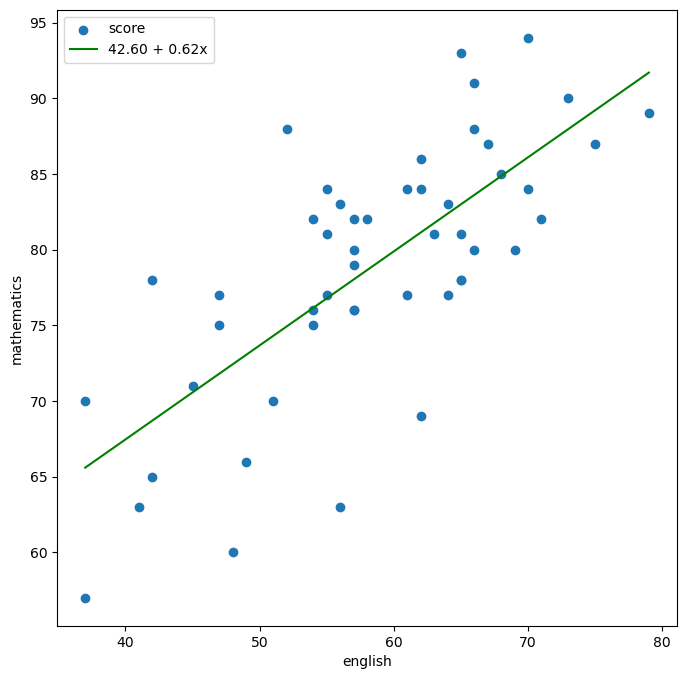

In [35]:
english_scores = np.array(df['english']) #영어 점수 어레이 생성
math_scores = np.array(df['mathematics'])
poly_fit = np.polyfit(english_scores, math_scores, 1) #베타 0과 1을 구하는 함수
poly_1d = np.poly1d(poly_fit) #(베타1 + 베타0)x를 반환하는 함수
xs = np.linspace(english_scores.min(), english_scores.max()) #x좌표를 생성
ys = poly_1d(xs) #xs에 대응하는 y 생성

fig = plt.figure(figsize=(8,8)) #그릴 범위 설정
ax = fig.add_subplot(111) #1x1범위에 1개씩 채운다는 의미

ax.scatter(english_scores, math_scores, label = 'score') #영어점수와 수학점수의 산점도 그리고 score라고 이름짓기
ax.set_xlabel('english') #x축에 english 레이블 설정
ax.set_ylabel('mathematics') #y축에 mathematics 레이블 설정
ax.plot(xs, ys, color='green', label=f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x') #회귀직선 그리기
ax.legend(loc = 'upper left') #범례 표시
plt.show()

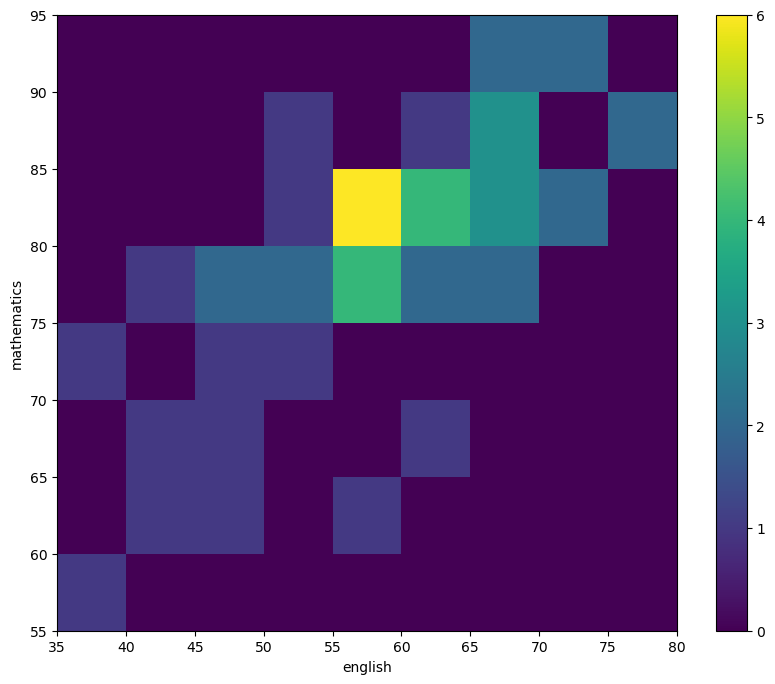

In [36]:
fig = plt.figure(figsize=(10, 8)) #범위 지정
ax = fig.add_subplot(111) #그리는 방법 지정

c = ax.hist2d(english_scores, math_scores, bins=[9,8], range = [(35, 80), (55, 95)]) # 35부터 80을 9개로 나누고 55부터 95를 8개로 나누어 히트맵 작성
ax.set_xlabel('english') #x축에 english 레이블 설정
ax.set_ylabel('mathematics') #y축에 mathematics 레이블 설정
ax.set_xticks(c[1]) # c[1]을 엑스축에 표시
ax.set_yticks(c[2]) # c[2]을 와이축에 표시
fig.colorbar(c[3], ax=ax)
plt.show()

In [38]:
anscombe_data = np.load('../stat_analysis/data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [39]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean', 'Y_variance', 'X&Y_correlation', 'X&Y_regression line'])

for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX, dataY, 1) #회귀직선 생성
    stats_df[f'data{i+1}'] =\
    [f'{np.mean(dataX):.2f}',
     f'{np.var(dataX):.2f}',
     f'{np.mean(dataY):.2f}',
     f'{np.var(dataY):.2f}',
     f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
     f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df
    

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


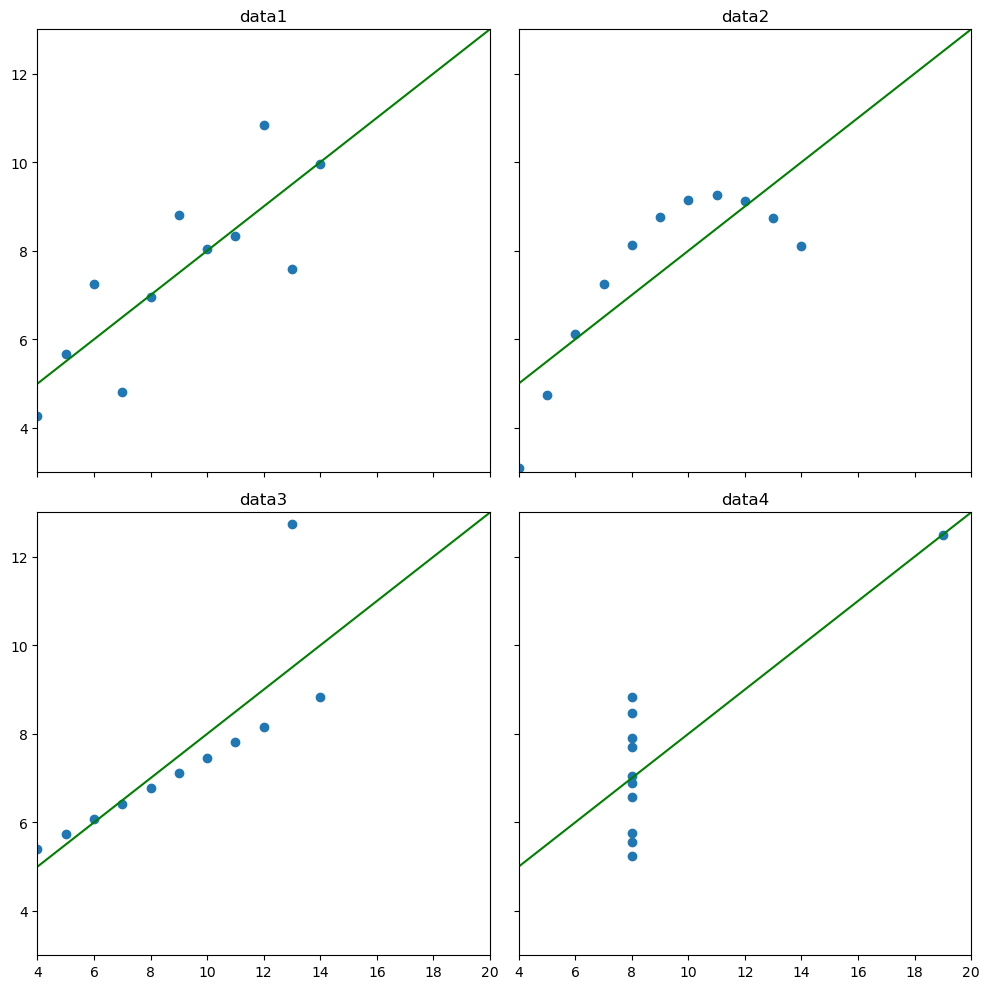

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
xs = np.linspace(0, 30, 100)
for i , data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit) 
    ys = poly_1d(xs)
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3,13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='green')

plt.tight_layout()
plt.show()